In [28]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
from idqn.utils.confidence_interval import confidence_interval

experiment_names = [
    # "hyper_t1_s1/Breakout", "hyper_t1_s2/Breakout", "hyper_t1_s3/Breakout", 
    "hyper_t5_s1/Breakout", "hyper_t5_s2/Breakout", "hyper_t5_s3/Breakout", 
    # "hyper_t10_s1/Breakout", "hyper_t10_s2/Breakout", "hyper_t10_s3/Breakout", 
]
bellman_iterations_scopes = [10]
seeds = [11, 21, 31]

p = json.load(open(f"figures/{experiment_names[0].split('/')[0]}/parameters.json"))

n_seeds = len(seeds)
ticks_freq = 10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Extract data

In [29]:
idqn_j = np.zeros((len(experiment_names), len(bellman_iterations_scopes), n_seeds, p["n_epochs"] + 1)) * np.nan

for idx_experiment, experiment_name in enumerate(experiment_names):
    for idx_bellman, bellman_iterations_scope in enumerate(bellman_iterations_scopes):
        for idx_seed, seed in enumerate(seeds):
            idqn_j[idx_experiment, idx_bellman, idx_seed] = np.load(f"figures/{experiment_name}/iDQN/{bellman_iterations_scope}_J_{seed}.npy")

### Performances

In [30]:
idqn_j_mean = idqn_j.mean(axis=2)
idqn_j_std = idqn_j.std(axis=2)
idqn_j_confidence_interval = np.zeros((len(experiment_names), len(bellman_iterations_scopes), 2, p["n_epochs"] + 1))

for idx_experiment in range(len(experiment_names)):
    for idx_bellman in range(len(bellman_iterations_scopes)):
        idqn_j_confidence_interval[idx_experiment, idx_bellman] = confidence_interval(idqn_j_mean[idx_experiment, idx_bellman], idqn_j_std[idx_experiment, idx_bellman], n_seeds)

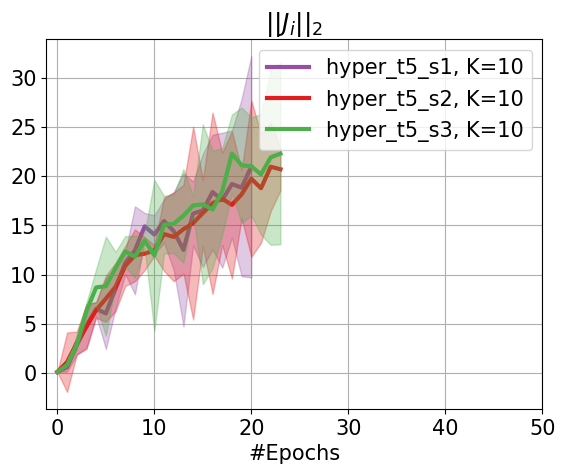

In [31]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(p["n_epochs"] + 1)

for idx_experiment, experiment_name in enumerate(experiment_names):
    for idx_bellman, bellman_iterations_scope in enumerate(bellman_iterations_scopes):
        idx = idx_experiment * len(bellman_iterations_scopes) + idx_bellman
        plt.plot(iterations, idqn_j_mean[idx_experiment, idx_bellman], label=f"{experiment_name.split('/')[0]}, K={bellman_iterations_scope}", color=colors[f"{idx}"], zorder=2)
        plt.fill_between(iterations, idqn_j_confidence_interval[idx_experiment, idx_bellman, 0], idqn_j_confidence_interval[idx_experiment, idx_bellman, 1], color=colors[f"{idx}"], alpha=0.3, zorder=2)

plt.xticks(range(0, p["n_epochs"] + 1, ticks_freq))
plt.xlabel("#Epochs")
plt.title(r"$|| J_i ||_2$")
plt.legend().set_zorder(3)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_names[0]}/J.pdf", bbox_inches='tight')